Profil Dicoding

Nama     : Diana Wulandari

Username : dianawulan02

Email    : dianawulandari747@gmail.com

untuk memenuhi tugas submission Dicoding, modul Belajar Machine Learning Untuk Pemula  

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# mendownload file data
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-23 04:41:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.36MB/s    in 62s     

2021-07-23 04:42:12 (4.99 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# mengekstrak file
import os
import zipfile
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
# mengecek isi file, kertas
import os
print("===== PAPER =====")
print()

fold_kertas = os.path.join('/content/rockpaperscissors/paper') 
print('Total gambar kertas:', len(os.listdir(fold_kertas)))

file_kertas = os.listdir(fold_kertas)                                             #Mendaftar file di dalam folder kertas
print("Kertas:",file_kertas[:3]) 

===== PAPER =====

Total gambar kertas: 712
Kertas: ['4fCqIVTEuFLsQMaZ.png', 'hWVwQVI74lc5zgyK.png', '7v943QrV87m1Fx5U.png']


In [5]:
# mengecek isi file, batu
import os    
print("===== ROCK =====")
print() 

fold_batu= os.path.join('/content/rockpaperscissors/rock') 
print('Total :', len(os.listdir(fold_batu)))                                     # menampilkan total file gambar batu
                                   
file_batu = os.listdir(fold_batu)                                           
print("Sampel gambar :",file_batu[:3])                                           # menampilkan 3 file batu

===== ROCK =====

Total : 726
Sampel gambar : ['4vXhIZv7KkPhyfX9.png', 'IoVOalbQe90ghv9U.png', 'XdWXMPZZwwXhwYGI.png']


In [6]:
# mengecek isi file, gunting
import os              
print("===== SCISSORS =====")
print()

fold_gunting = os.path.join('/content/rockpaperscissors/scissors') 
print('Total :', len(os.listdir(fold_gunting)))                                  # menampilkan total file gambar gunting
                                    
file_gunting = os.listdir(fold_gunting)                                           
print("Sampel gambar :",file_gunting[:3])                                        # menampilkan 3 file gunting

===== SCISSORS =====

Total : 750
Sampel gambar : ['EWWFVEzkNulhftg2.png', 'TfQG2fJYyDv8Ic8P.png', 'msOEQAWveiL7r5rp.png']


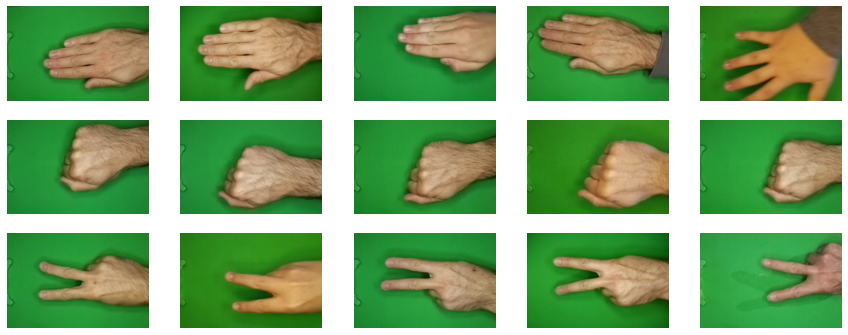

In [7]:
# menampilkan sampel gambar dari file rockpaperscissors
import matplotlib.pyplot as plt                                                 
import matplotlib.image as mpimg
%matplotlib inline

nrows = 4                                                                       
ncols = 5                                                                        # jumlah gambar dalam 1 baris

pic_index = 0                                                                   
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 2)                                        # Mengatur ukuran output gambar

pic_index += 5

# kertas
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                          
                      for fname in file_kertas[pic_index-5:pic_index]]           # Menampilkan 5 sampel gambar kertas
# batu                      
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                            
                      for fname in file_batu[pic_index-5:pic_index]]             # Menampilkan 5 sampel gambar batu
# gunting                      
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                         
                      for fname in file_gunting[pic_index-5:pic_index]]          # Menampilkan 5 sampel gambar gunting


for i, img_path in enumerate(
  gbr_tampil_kertas+gbr_tampil_batu+gbr_tampil_gunting):
  sp = plt.subplot(nrows, ncols, i + 1)                                          
  sp.axis('Off')                                                                  

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()                    

In [18]:
# tahap augmentasi data
import tensorflow as tf                                                        
import keras_preprocessing                                                        
from keras_preprocessing import image                                            
from keras_preprocessing.image import ImageDataGenerator

# membuat image data generator
# membagi dataset
basic_dir = "/content/rockpaperscissors/rps-cv-images/"                          
training_datagen = ImageDataGenerator(                                           
   rescale = 1./255,      

# pengaturan augmentasi                                                          # untuk mendapat dataset tambahan dari dataset yg sudah ada
	 rotation_range=45,                                                         
   horizontal_flip=True,
   zoom_range=0.25,
   width_shift_range=0.25,                                                      
   height_shift_range=0.25,                                                     
   shear_range=0.25,                                                                                                                                                                 
   fill_mode='nearest',                                                        
# pembagian data validation     
   validation_split=0.4                                                          # membagi data dengan validation set sebesar 40%
)

# pengaturan pembagian trainset dan validation set
train_generator = training_datagen.flow_from_directory(                         
	basic_dir,                                                                     
	target_size=(160,160),
  batch_size = 20,                                                        
	class_mode='categorical',                                                      
  shuffle=True,                                                                   
  subset='training' 
)                                                              

validation_generator = training_datagen.flow_from_directory(                   
	basic_dir,                                                                     
	target_size=(160,160),
  batch_size = 20,                                                          
	class_mode='categorical',                                                      
  shuffle=True,
  subset='validation'  
)     

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [19]:
# membangun jaringan syaraf
model = tf.keras.models.Sequential([                                             
                                                                                 # Layer Konvolusi 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                        # Layer Konvolusi 2
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                        # Layer Konvolusi 3
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                   # Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(150, activation='relu'),                               # Hiden layer 
    tf.keras.layers.Dense(515, activation='relu'),                               # Hiden layer 
    tf.keras.layers.Dense(3, activation='softmax')                               # output
])

model.summary()                                                                  # Menampilkan hasil

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)            

In [20]:
# optimasi
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
# callback, akan menghentikan epoch jika akurasi sudah berada di 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print("\nAkurasi sudah mencapai 95%")
      self.model.stop_training = True

callbacks = myCallback()     

In [22]:
# epoch
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/50
20/20 - 9s - loss: 1.1253 - accuracy: 0.3426 - val_loss: 1.0952 - val_accuracy: 0.4375
Epoch 2/50
20/20 - 8s - loss: 1.0970 - accuracy: 0.3475 - val_loss: 1.1131 - val_accuracy: 0.2750
Epoch 3/50
20/20 - 8s - loss: 1.1068 - accuracy: 0.3975 - val_loss: 1.0930 - val_accuracy: 0.3125
Epoch 4/50
20/20 - 8s - loss: 1.1026 - accuracy: 0.3122 - val_loss: 1.0841 - val_accuracy: 0.3875
Epoch 5/50
20/20 - 8s - loss: 1.0921 - accuracy: 0.4264 - val_loss: 1.0964 - val_accuracy: 0.3625
Epoch 6/50
20/20 - 8s - loss: 1.0920 - accuracy: 0.4125 - val_loss: 1.0387 - val_accuracy: 0.5500
Epoch 7/50
20/20 - 8s - loss: 1.0908 - accuracy: 0.4575 - val_loss: 0.9972 - val_accuracy: 0.5125
Epoch 8/50
20/20 - 8s - loss: 1.0535 - accuracy: 0.4450 - val_loss: 0.9998 - val_accuracy: 0.5625
Epoch 9/50
20/20 - 8s - loss: 1.0139 - accuracy: 0.4721 - val_loss: 0.9146 - val_accuracy: 0.6375
Epoch 10/50
20/20 - 8s - loss: 0.9361 - accuracy: 0.5736 - val_loss: 0.8885 - val_accuracy: 0.6375
Epoch 11/50
20/20 -

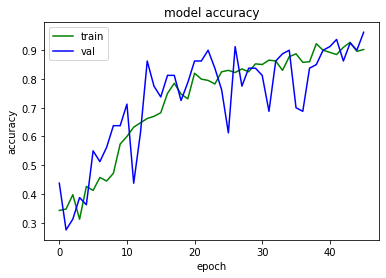

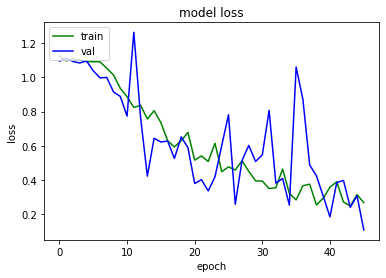

In [23]:
# plot akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, color='green')
plt.plot(val_acc, color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, color='green')
plt.plot(val_loss, color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 1vQCX4af6hQmuwxZ.png to 1vQCX4af6hQmuwxZ (1).png
1vQCX4af6hQmuwxZ.png
[[0. 0. 1.]]
Ini adalah gunting


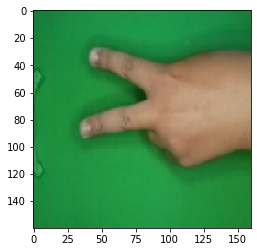

In [24]:
# prediksi gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  # prediksi
  path = fn
  img = image.load_img(path,target_size=(160,160))
  imgplot = plt.imshow(img)                                                      # Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)

  print(fn)                                                                      # Menampilkan nama file gambar
  print(classes)                                                                 # Menampilkan jenis classes gambar
  
  # deteksi gambar
  if classes[0][0]!=0:
    print('Ini adalah kertas')                                                  
  elif classes[0][1]!=0:
    print('Ini adalah batu')
  elif classes[0][2]!=0:
    print('Ini adalah gunting')
  else:
    print('Tidak Diketahui')    